# 线性回归


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
path = "ex1data1.txt"
data = pd.read_csv(path, header=None, names=["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## 看下数据长什么样子


<Axes: xlabel='Population', ylabel='Profit'>

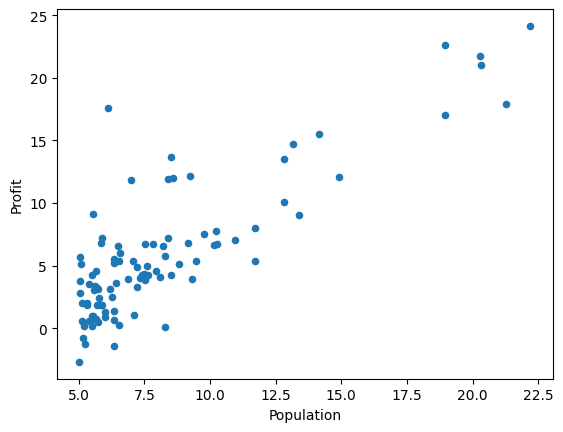

In [6]:
data.plot(kind="scatter", x="Population", y="Profit")

首先，我们将创建一个以参数 θ 为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}} $$


In [7]:
data.insert(0, "ones", 1)

### 初始化模型参数，输入矩阵，输出矩阵

In [8]:
theta = np.matrix([0.0, 0.0])
x = np.matrix(data[["ones", "Population"]].values)
y = np.matrix(data[["Profit"]].values)

In [9]:
def computeCost(x: np.matrix, y: np.matrix, theta: np.matrix):
    # np.matric.T 为矩阵的转置
    return 1 / (2 * len(x)) * np.sum(np.power((x * theta.T - y), 2))

computeCost(x, y, theta)

32.072733877455676

### 梯度下降

In [10]:
alpha = 0.01
iterations = 1000

In [84]:
def gradient_decent(x, y, theta, alpha, iterations):
    delta = np.zeros((iterations, theta.shape[1]))
    cost = np.zeros(iterations)
    for k in np.arange(iterations):
        for j in np.arange(theta.shape[1]):
            delta[k, j] = (
                alpha * np.sum(np.multiply((x * theta.T - y), x[:, j])) / len(x)
            )
            theta[0, j] = theta[0, j] - delta[k, j]
        cost[k] = computeCost(x, y, theta)
    return theta, cost, delta


theta, cost, delta = gradient_decent(x, y, theta, alpha, iterations)

In [12]:
# 模型训练后的预估
computeCost(x,y,theta)

4.514833339953507

### 绘制拟合曲线

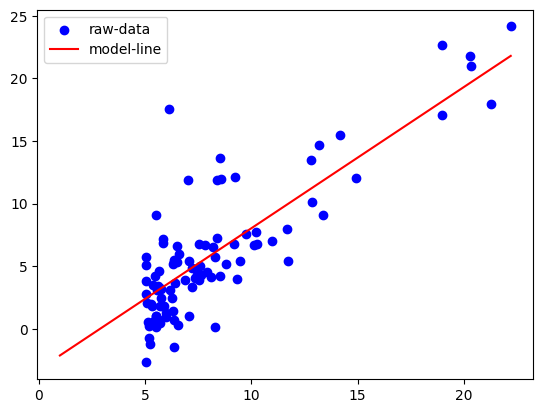

In [41]:
# 绘制原始数据的散点图
plt.scatter(data['Population'], data['Profit'], label="raw-data", color="blue")

# 绘制拟合曲线
# 绘制拟合曲线
x1 = np.arange(x.min(), x.max(), 0.01)
xx = np.vstack((np.ones_like(x1), x1)).T
y1 = xx @ theta.T
plt.plot(x1, y1, label="model-line", color="red")

# 添加图例
plt.legend()

# 显示图形
plt.show()

### 显示训练过程

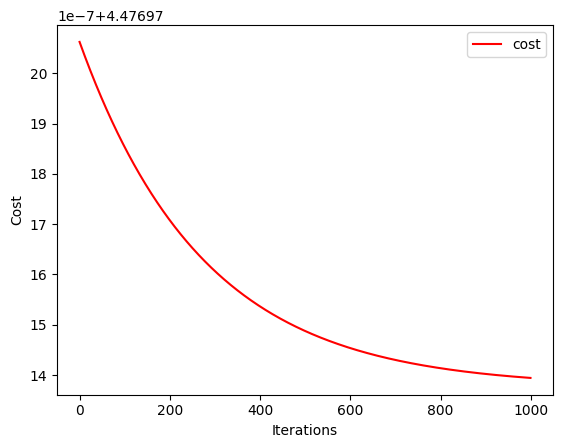

In [63]:
iters = np.arange(iterations)
plt.plot(iters, cost,label='cost',color='r')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

plt.show()


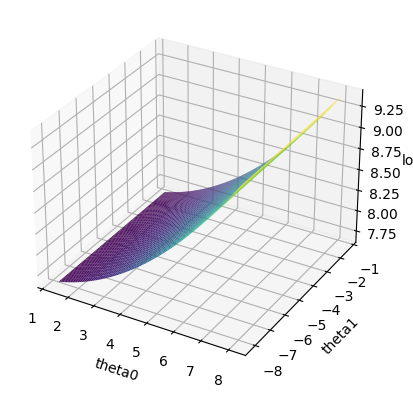

In [132]:
# 创建一个3D图形的figure
fig = plt.figure()

# 创建3D坐标轴
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(delta[:,0], delta[:,1])

# 绘制曲面图
ax.plot_surface(X, Y, cost.reshape(1,-1), cmap='viridis')

# 设置坐标轴的标签
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('loss')

# 显示图形
plt.show()


In [130]:
delta

array([[ 8.10971156e-07, -8.13242653e-08],
       [ 8.09497342e-07, -8.11764710e-08],
       [ 8.08026206e-07, -8.10289455e-08],
       ...,
       [ 1.32249642e-07, -1.32620067e-08],
       [ 1.32009298e-07, -1.32379051e-08],
       [ 1.31769392e-07, -1.32138472e-08]])